# Lab 4: Clustering (Part 3)

**(Part 3 of 3)**   
By **Jackie Kazil** | Lab Assignment 4 | CSS 739, Spring 2015 | GeoSocial Analysis

### Question 2: How each clustering works (cont)
The three appraoches that were used are K-means, Agglomerative, and **Affinity Propagation**.

#### Affinity Propagation Clustering

The basic idea behind the affinity propagation clustering is based off of a paper by Brendan J. Frey and Delbert Dueck[1]. The algorithm works to cluster data by identifying a subset of representative examples, which as the base. As the algorithm interates through the data similar to exemplarly points are attached to the cluster. 

According to Frey and Dueck, "affinity propagation found clusters with much lower error than other methods.. less than one-hundredth the amount of time."

Documentation for [affinity propagation](http://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#example-cluster-plot-affinity-propagation-py). 

Let's see this in action. To start the process, first we load the data from the CSV file into a dataframe.

In [11]:
import matplotlib
%matplotlib inline

import pandas as pd
df = pd.read_csv('Olympic_torch_2012_UK.csv')

##### Settting up the function to apply agglomerative clustering

Once again, I explored latitude and longitude along with date and times, which required convertion from the format to seconds.

In [12]:
import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import AffinityPropagation

# Convert date and time to seconds for clustering.
try:
    time_format = "%Y-%m-%d %H:%M:%S %Z"
    df['date'] = df['date'].apply(lambda x: time.mktime(time.strptime(str(x), time_format)))
except ValueError:
    pass

def graph_affinity(lookup_keys=['latitude','longitude'], preference=None):
    if preference:
        model = AffinityPropagation(preference=preference)
    else:
        model = AffinityPropagation()
    output = model.fit(df[lookup_keys]).labels_
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.scatter(df['longitude'], df['latitude'], c=output)
    
    cluster_centers_indices = model.cluster_centers_indices_
    labels = model.labels_

    n_clusters_ = len(cluster_centers_indices)

    print('Estimated number of clusters: %d' % n_clusters_)    
    return

Below is a general affinity run. This resulted in 712 clusters.

Estimated number of clusters: 712


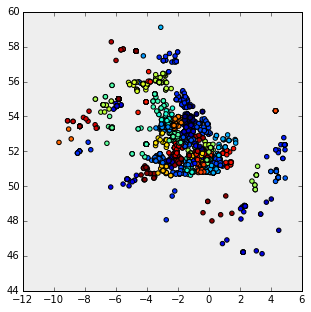

In [8]:
graph_affinity()

##### Looking at affinity by date

One could day that the lower populate areas are a different clustering, because there is less information from those areas there for they are more likely to not be a part of the large red cluster -- which is seemed to be the most active time period for the tweet datetime stamp.

Estimated number of clusters: 4329


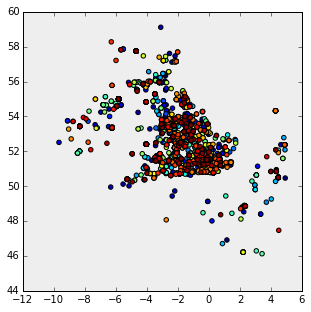

In [13]:
graph_affinity(lookup_keys=['date'])

When I encountered this particular clustering method, I was very interested in it, but I didn't find as much value as I was hoping for. Maybe you will see something I didn't in the map below.

In [27]:
#import mplleaflet
#mplleaflet.display(fig=graph_affinity())


[1]:  Brendan J. Frey and Delbert Dueck, “[Clustering by Passing Messages Between Data Points](http://www.psi.toronto.edu/affinitypropagation/FreyDueckScience07.pdf)”, Science Feb. 2007.